# HW1

## Part-1    Linear Filter

### a. Image Denoising

Write a Gaussian filter to denoise the given noisy image. The size of the filter is up to you. Show the result.

### I.

This imports all the dependent packages and loads the image.

**Do not modify this part.**

size of loaded image is  (508, 508)


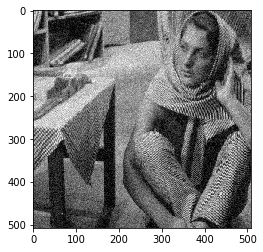

In [57]:
# do not change this part
# import the packages needed for this task, you will need to install
# them if you do not have them
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load the image
I = np.asarray(Image.open('noisy_image.jpg').convert("L"), dtype=float)

# print the size of loaded image
print("size of loaded image is ", I.shape)

# show the loaded image
plt.imshow(I, cmap="gray")

### II.

Here is a demo using mean filter to denoise the image, the noise is removed but the image is blurred.

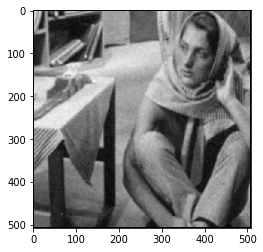

In [58]:
# demo
# using mean filter to denoise the image

my_filter = np.ones([5,5])
m, n = my_filter.shape
my_filter = my_filter / m / n
new_img = np.zeros_like(I)

for i in range(I.shape[0] - m//2 * 2):
    for j in range(I.shape[1] - n//2 * 2):
        new_img[i+m//2,j+n//2] = sum(sum(np.multiply(I[i:i+m, j:j+n], my_filter)))
        
plt.imshow(new_img, cmap="gray")

### III.

<span style="color:red">**Todo:**</span>

You need to implement a Gaussian filter (choose a reasonable size), and use this filter to denoise the image. 

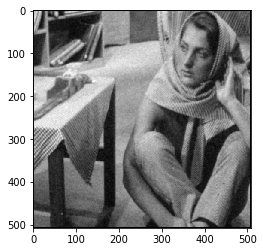

In [59]:
# todo:
# implement Gaussian filter to denoise the image
import math

class GaussianFilter(object):
    
    def __init__ (self, height, width, stDev):
        
        self.M = height
        self.N = width
        self.StDev = stDev
        self.Kernel = self.BuildKernel()
    
    def BuildKernel(self):
        
        kernel = np.ones([self.M,self.N])
        v = self.StDev**2 * 2
        pi = math.pi
        
        total = 0
        yNeg = -(self.M//2)
        xNeg = -(self.N//2)

        for i in range(0, self.M):
            for j in range(0, self.N):
                y = i + yNeg
                x = j + xNeg
                
                kernel[i,j] = math.exp(-(x**2 + y**2) / v) / v / pi
                total += kernel[i,j]
        
        # Normalize the filter
        kernel = kernel / total
        
        return kernel
    
    def FilterImage(self, image):
        
        newImg = np.zeros_like(image)

        for i in range(image.shape[0] - self.M//2 * 2):
            for j in range(image.shape[1] - self.N//2 * 2):
                newImg[i + self.M//2,j + self.N//2] = sum(sum(np.multiply(
                        image[i:i + self.M, j:j + self.N], self.Kernel)))
        
        return newImg
    
gaussian = GaussianFilter(7,7,1)
newImage = gaussian.FilterImage(I)

plt.imshow(newImage, cmap="gray")

### b. Edge Detection

Write a Laplacian filter for edge detection. The size of the filter is up to you. Show the result.

### I.

This part imports all the dependent packages and loads the image.

**Do not modify this part.**

size of loaded image is  (210, 240)


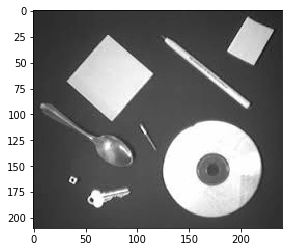

In [60]:
# do not change this part
# import the packages needed for this task, you will need to install
# them if you do not have them
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load the image
I = np.asarray(Image.open('edge_detection_image.jpg').convert("L"), dtype=float)

# print the size of loaded image
print("size of loaded image is ", I.shape)

# show the loaded image
plt.imshow(I, cmap="gray")

### II.

Here is a demo using the Sobel operator (https://en.wikipedia.org/wiki/Sobel_operator) to detect edges. 

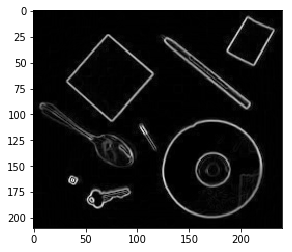

In [61]:
# demo
# sobel edge detector
# https://en.wikipedia.org/wiki/Sobel_operator

Gy = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Gx = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
m, n = Gx.shape
edge_x_img = np.zeros_like(I)
edge_y_img = np.zeros_like(I)
edge_img = np.zeros_like(I)

for i in range(I.shape[0] - m//2 * 2):
    for j in range(I.shape[1] - n//2 *2):
        edge_x_img[i+m//2,j+n//2] = sum(sum(np.multiply(I[i:i+m, j:j+n], Gx)))
        edge_y_img[i+m//2,j+n//2] = sum(sum(np.multiply(I[i:i+m, j:j+n], Gy)))
        edge_img[i+m//2, j+n//2] = np.sqrt(edge_x_img[i+m//2,j+n//2] ** 2 + edge_y_img[i+m//2,j+n//2] ** 2)

plt.imshow(edge_img, cmap="gray")

### III.

<span style="color:red">**Todo:**</span>

You need to perform edge detection using the Laplacian filter.

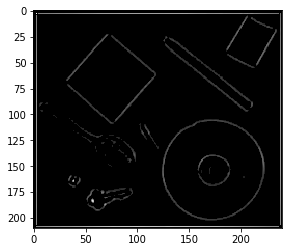

In [62]:
# todo:
# implement edge detection by laplacian operator
def LaplacianFilter(I):

    xStDer = np.zeros_like(I)
    yStDer = np.zeros_like(I)
    xNdDer = np.zeros_like(I)
    yNdDer = np.zeros_like(I)

    filtered = np.zeros_like(I)

    xGrad = np.array([-1,1])
    yGrad = np.array([[-1],[1]])

    gaussian = GaussianFilter(7,7,1)
    V = gaussian.FilterImage(I)
    m, n = I.shape

    for i in range(m):
        for j in range(n):
            if (j < n-1):
                xStDer[i, j+1] = sum(np.multiply(V[i, j:j+2],xGrad))
            if (i < m-1):
                yStDer[i+1, j]=sum(np.multiply(V[i:i+2, j:j+1],yGrad))[0]
        
    for i in range(m):
        for j in range(n):
            if (j < n-1):
                xNdDer[i, j+1]=sum(np.multiply(xStDer[i, j:j+2],xGrad))
            if (i < m-1):
                yNdDer[i+1, j]=sum(np.multiply(yStDer[i:i+2, j:j+1],yGrad))[0]
        
            v = xNdDer[i,j]+ yNdDer[i,j]
            if v > 10:
                filtered[i,j] = v
    
    return filtered


filtered = LaplacianFilter(I)
plt.imshow(filtered, cmap="gray")

### c. SSD (Sum of Squared Differences)

The three channels of the given image have been shifted, find the shift offset by SSD and recover the original image. You may align any two channels to the third one. As long as the image is well recovered, you will receive full credit. You may assume the shift offset in both directions between the channels is no larger than $40$ pixels.

### I.

This part imports all the dependent packages and loads the image.

**Do not modify this part.**

size of loaded image is  (180, 320, 3)


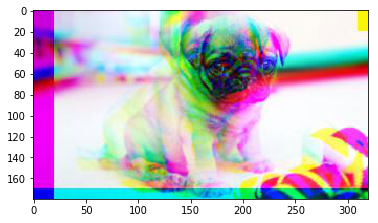

In [63]:
# do not change this part
# import the packages needed for this task, you will need to install
# them if you do not have them

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load the image
I = np.asarray(Image.open('pug_image.jpg'))
I.setflags(write=1)

# print the size of loaded image
print("size of loaded image is ", I.shape)

# show the loaded image
plt.imshow(I)

### II.

<span style="color:red">**Todo:**</span>

You need to align the image **by SSD**.

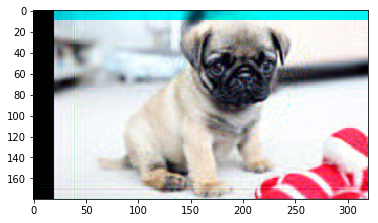

In [64]:
# todo:
# recover the original image
import numpy as np
import math

V = np.array(I)
m, n, k = I.shape

red_off = []
blue_off = []

red_min = math.inf
blue_min = math.inf
red_ssd = math.inf
blue_ssd = math.inf

for i in range(-40,41):
    for j in range(-40,41):
        
        red = np.array(V[max(-i,0):m - max(i,0), max(-j,0):n - max(j,0), 0])
        green = np.array(V[max(i,0):m - max(-i,0), max(j,0):n - max(-j,0), 1])
        blue = np.array(V[max(-i,0):m - max(i,0), max(-j,0):n - max(j,0), 2])
        
        size = green.shape[0] * green.shape[1]
        
        red_ssd = np.mean((red - green)**2)
        blue_ssd = np.mean((blue - green)**2)
        
        red_off.append([i,j, red_ssd])
        blue_off.append([i,j, blue_ssd])


def rgb_shift(image, red_off, blue_off):
    
    new_image = np.zeros_like(image)
    m, n, k = new_image.shape
    # green
    new_image[:,:,1] = image[:,:,1]
    
    red_min = min(red_off, key=lambda x: x[2])
    blue_min = min(blue_off, key=lambda x: x[2])
    
    red_row = red_min[0]    
    red_col = red_min[1]    
    blue_row = blue_min[0]  
    blue_col = blue_min[1]  
    
    red_image = np.array(V[max(-red_row,0): m-max(red_row,0), max(-red_col,0): n-max(red_col,0), 0])
    rg_zone = new_image[max(red_row,0): m-max(-red_row,0), max(red_col,0): n-max(-red_col,0), :]
    rg_zone[:,:,0] = red_image
    
    blue_image = np.array(V[max(-blue_row,0): m-max(blue_row,0), max(-blue_col,0): n-max(blue_col,0), 2])
    bg_zone = new_image[max(blue_row,0): m-max(-blue_row,0), max(blue_col,0): n-max(-blue_col,0), :]
    bg_zone[:,:,2] = blue_image
    
    red_size = red_image.shape[0] * red_image.shape[1]
    blue_size = blue_image.shape[0] * blue_image.shape[1]
    
    return new_image

new_image = rgb_shift(I, red_off, blue_off)
plt.imshow(new_image)


## Part-2    Hybrid Images

### I.

This part imports all the dependent packages and loads the image.

**Do not modify this part.**

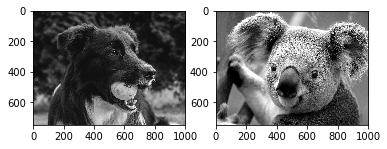

In [65]:
# do not change this part
# import the packages needed for this task, you will need to install
# them if you do not have them

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load the image
dog = np.asarray(Image.open('dog.jpg').convert("L"), dtype=float) / 255
dog.setflags(write=1)

# load the image
koala = np.asarray(Image.open('koala.jpg').convert("L"), dtype=float) / 255
koala.setflags(write=1)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(dog, cmap='gray')
axarr[1].imshow(koala, cmap='gray')

### II.

<span style="color:red">**Todo:**</span>

For the koala image, keep the high frequencies and remove the low frequencies. For the dog image, keep the low frequencies and remove the high frequencies. Show the results.

**HINT:** you may use functions in numpy package to perform 2-D Fourier transform and inverse transform

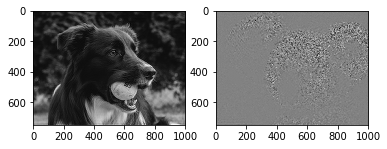

In [66]:
# todo:
# process the image as required

m,n = dog.shape

y,x = 300, 400

dog_freq = np.array(np.fft.fft2(dog,[m,n]))
dog_freq = np.fft.fftshift(dog_freq)
dog_low = np.zeros_like(dog_freq)
dog_low[y:-y,x:-x] = dog_freq[y:-y,x:-x]
dog_low = np.fft.ifftshift(dog_low)

dog_new = np.real(np.fft.ifft2(dog_low, dog_low.shape))

j,k = koala.shape

koala_freq = np.array(np.fft.fft2(koala,[j,k]))
koala_freq = np.fft.fftshift(koala_freq)
koala_high = np.array(koala_freq)
koala_high[y:-y,x:-x] = 0

koala_high = np.fft.ifftshift(koala_high)
koala_new = np.real(np.fft.ifft2(koala_high, koala_high.shape))

f, axarr = plt.subplots(1,2)

axarr[0].imshow(dog_new, cmap='gray')
axarr[1].imshow(koala_new, cmap='gray')



### III.

<span style="color:red">**Todo:**</span>

Now, combine the two into a hybrid image. Show the result.

Keep sampling the image. Show the result. 

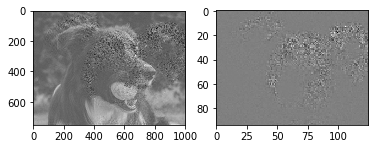

In [67]:
# todo:
# get the hybrid image and sampling results

from scipy import ndimage

hybrid_freq = np.array(koala_freq)
hybrid_freq[y:-y,x:-x] = dog_freq[y:-y,x:-x]

hybrid_freq = np.fft.ifftshift(hybrid_freq)
hybrid = np.real(np.fft.ifft2(hybrid_freq, hybrid_freq.shape))

sub_samples = []
sub_samples.append(np.array(ndimage.filters.laplace(hybrid)[::2,::2]))
sub_samples.append(np.array(ndimage.filters.laplace(sub_samples[0])[::2,::2]))
sub_samples.append(np.array(ndimage.filters.laplace(sub_samples[1])[::2,::2]))

f, axarr = plt.subplots(1,2)

axarr[0].imshow(hybrid, cmap='gray')
axarr[1].imshow(sub_samples[2], cmap='gray')